In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
open('attacks.csv')

<_io.TextIOWrapper name='attacks.csv' mode='r' encoding='cp1252'>

In [25]:
attack = pd.read_csv('attacks.csv', encoding="cp1252")
attack.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1879,2002.03.03,03-Mar-2002,2002.0,Invalid,NEW CALEDONIA,Loyalty Islands,Lifou,Spearfishing,Yves Koidrin,M,...,Shark involvement prior to death unconfired,"Les Nouvelles Caledoniennes, 3/11/2002",2002.03.03-Yves-Koidrin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.03.03,2002.03.03,4424.0,NaN,NaN


In [96]:
attack.shape

(6302, 22)

In [95]:
attack.dropna(axis=0, thresh=10, inplace=True)
attack.drop_duplicates(inplace=True)
attack.dropna(axis=1, thresh=2000, inplace=True)


In [29]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [35]:
repeated_values=attack[attack['Case Number.1'].isin(attack['Case Number.2'])]
len(repeated_values)

6283

In [36]:
repeated_values2=attack[attack['href formula'].isin(attack['href'])]
len(repeated_values2)

6242

In [32]:
#attack["Sex "].value_counts(dropna=False)

In [172]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [194]:
#(attack['Case Number.1']==attack['Case Number.2']).count()
def duplicados (x, y):

    if x==y:
         return 1
    else:
        return 0


In [232]:
#attack["new"] = attack.apply(lambda x: duplicados(["Date"][x], x["Sex "][x]))

In [37]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [43]:
attacks=attack.drop(columns=["pdf", "href", "Case Number.1", "Case Number.2", "href formula", "original order", "Area", "Location", "Species ", "Time", "Injury", "Activity", "Date", "Case Number"])

In [44]:
attacks.shape

(6302, 8)

In [45]:
attacks.sample()


,Year,Type,Country,Name,Sex,Age,Fatal (Y/N),Investigator or Source
3829,1962.0,Provoked,NEW ZEALAND,W.T. Luxton,M,NaN,N,"Christchurch Star, 3/26/1962"


In [46]:

attacks["Fatal (Y/N)"].value_counts(dropna=False)

N          4293
Y          1388
NaN         539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [47]:
attacks["Fatal (Y/N)"]=attacks["Fatal (Y/N)"].replace({"y":"Y", " N": "UNKNOWN", "M":"UNKNOWN", "N ":"N", "2017":"UNKNOWN"})
attacks["Fatal (Y/N)"]=attacks["Fatal (Y/N)"].fillna("UNKNOWN") 
attacks["Fatal (Y/N)"].value_counts(dropna=False)

N          4294
Y          1389
UNKNOWN     619
Name: Fatal (Y/N), dtype: int64

In [48]:
attacks["Investigator or Source"].value_counts(dropna=False)

C. Moore, GSAF                                                    105
C. Creswell, GSAF                                                  92
S. Petersohn, GSAF                                                 82
R. Collier                                                         55
T. Peake, GSAF                                                     48
                                                                 ... 
Deseret News, 2/19/1996; European Stars and Stripes, 2/20/1996      1
Daily Telegraph, 2/29/1996, p.5; H. Edwards, pp.31-32               1
J. Royle, et. al. (1997)                                            1
Advertiser, 3/6/1996, p.9; Daily Mail (London), 3/9/1996            1
S.W. Baker                                                          1
Name: Investigator or Source, Length: 4970, dtype: int64

In [51]:
attacks['Investigator or Source'] = attacks['Investigator or Source'].str.replace(", GSAF", "").str.replace(". GSAF", "").str.replace(", p.36", "").str.replace(", FSAF", "")

C:\Users\gqsal\AppData\Local\Temp\ipykernel_15708\3381948641.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks['Investigator or Source'] = attacks['Investigator or Source'].str.replace(", GSAF", "").str.replace(". GSAF", "").str.replace(", p.36", "").str.replace(", FSAF", "")


In [64]:
value_counts = attacks["Investigator or Source"].value_counts()
investigators = value_counts.index.tolist()
investigators=investigators [:22]
investigators.remove("GSAF")
investigators.remove("JCOnline")
investigators.remove("Hawaii Department of Land and Natural Resources")
investigators.remove("MEDSAF")
investigators



['C. Moore',
 'R. Collier',
 'C. Creswell',
 'S. Petersohn',
 'T. Peake',
 'M. Levine',
 'A. Gifford',
 'B. Myatt',
 'E. Pace',
 'M. Vorenberg',
 'E. Ritter',
 'G. Van Grevelynghe',
 'C. Johansson',
 'J. Green',
 'W. Leander',
 'C. Black',
 'R.D. Weeks',
 'K. Nakaya']

In [69]:
vc= attacks1death["Investigator or Source"].value_counts()
print(vc['R. Collier'])

98


In [57]:
#HYPOTHESIS 1: THE INVESTIGATOR WITH MORE CASES IS INDEED THE BEST INVESTIGATOR
attacks1=attacks

In [58]:
attacks1.sample()

,Year,Type,Country,Name,Sex,Age,Fatal (Y/N),Investigator or Source
358,2015.0,Unprovoked,USA,Braxton Rocha,M,27,N,"Big Island Video, 9/20/2015"


In [59]:

attacks1 = attacks1[attacks1["Investigator or Source"].isin(investigators)]
attacks1.shape



(743, 8)

In [60]:
# This is just for knowing the fatality rate
attacks1death = attacks1[attacks1["Fatal (Y/N)"] != "UNKNOWN"]
attacks1death.shape

(658, 8)

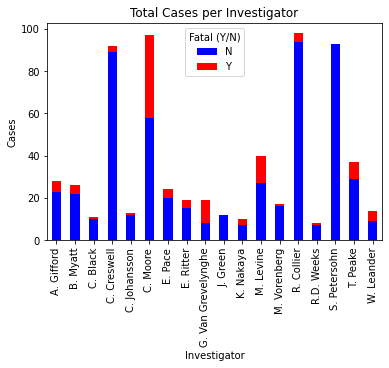

In [75]:
grouped = attacks1death.groupby(['Investigator or Source', 'Fatal (Y/N)']).size().reset_index(name='Counts')

pivot = grouped.pivot(index='Investigator or Source', columns='Fatal (Y/N)', values='Counts').fillna(0)

pivot.plot(kind='bar', stacked=True, color=['blue', 'red'])

plt.xlabel('Investigator')
plt.ylabel('Cases')
plt.title('Total Cases per Investigator')

plt.show()







In [70]:
attacks1["Country"].unique()

array(['USA', 'AUSTRALIA', 'UNITED KINGDOM', 'SOUTH AFRICA', 'EGYPT',
       'SEYCHELLES', 'NEW ZEALAND', 'MALAYSIA', 'AZORES', 'ECUADOR',
       'CUBA', 'PHILIPPINES', 'NEW CALEDONIA', 'SCOTLAND', 'BELIZE',
       'SPAIN', 'ST. MAARTIN', 'LIBERIA', 'SRI LANKA', 'BAHAMAS',
       'CARIBBEAN SEA', 'REUNION', 'MOZAMBIQUE', 'JAPAN', 'ITALY',
       'MEXICO', 'PORTUGAL', 'BERMUDA', 'FRANCE', 'GRENADA', 'TURKEY',
       'VANUATU', nan, 'ISRAEL', 'GREECE', 'CROATIA', 'TRINIDAD & TOBAGO',
       'CAPE VERDE', 'ENGLAND', 'MONTENEGRO', 'GUYANA', 'INDONESIA',
       'REUNION ISLAND', 'CRETE', 'SYRIA', 'CHINA', 'TOBAGO', 'ALGERIA',
       'NORWAY', 'SWEDEN', 'LEBANON', 'SUDAN'], dtype=object)

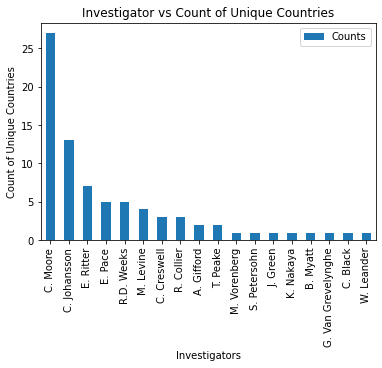

AttributeError: module 'matplotlib.pyplot' has no attribute 'getfigure'

In [71]:

grouped = attacks1.groupby('Investigator or Source')['Country'].nunique().reset_index(name='Counts')

grouped.sort_values(by='Counts', ascending=False, inplace=True)

grouped.plot(x='Investigator or Source', y='Counts', kind='bar')

plt.xlabel('Investigators')
plt.ylabel('Count of Unique Countries')
plt.title('Investigator vs Count of Unique Countries')

plt.show()
plt.getfigure().savefig("Shark-Attacks/Investigators by Country.png")

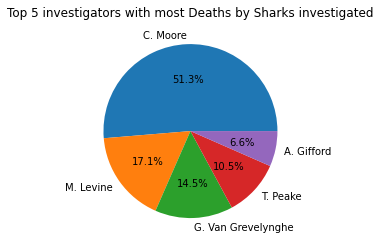

In [74]:

attacks13 = attacks1[attacks1['Fatal (Y/N)'] == 'Y']

group = attacks13.groupby('Investigator or Source').size().reset_index(name='county')

group.sort_values(by='county', ascending=False, inplace=True)
top_5 = group.head(5)
plt.pie(top_5['county'], labels=top_5['Investigator or Source'], autopct='%1.1f%%')
plt.title('Top 5 investigators with most Deaths by Sharks investigated')
plt.show()


In [86]:
attacks1time = attacks1[attacks1['Year'] >= 1993]

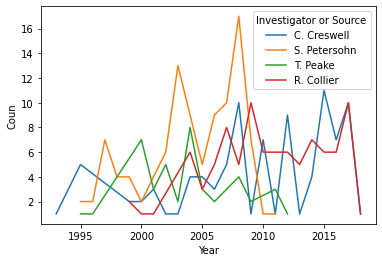

In [90]:
year_counts = attacks1time.groupby(['Year', 'Investigator or Source']).size().reset_index(name='Coun')

top_investigators = year_counts.groupby('Investigator or Source').sum().sort_values('Coun', ascending=False).head(4).index
sns.lineplot(x='Year', y='Coun', hue='Investigator or Source', data=year_counts[year_counts['Investigator or Source'].isin(top_investigators)])

plt.show()

In [91]:
attacks1["Sex "].value_counts(dropna=False)

M      573
F       90
NaN     80
Name: Sex , dtype: int64

In [94]:
#active= attacks1.groupby("Investigator or Source")["Year"].agg(['min', 'max']).to_dict('index')
#active

In [99]:
films = {}

films["Jaws"] = 1975
films["Deep Blue Sea"] = 1999
films["Open Water"] = 2003
films["Shark Tale"] = 2004
films["Shark Night/Soul Surfer"] = 2011
films["47 Meters Down"] = 2017
films["The Meg"] = 2018
films["Sharknado/The Shallows"] = 2013

film_years = list(films.values())
counting = [sum(attacks['Year'] == year) for year in film_years]

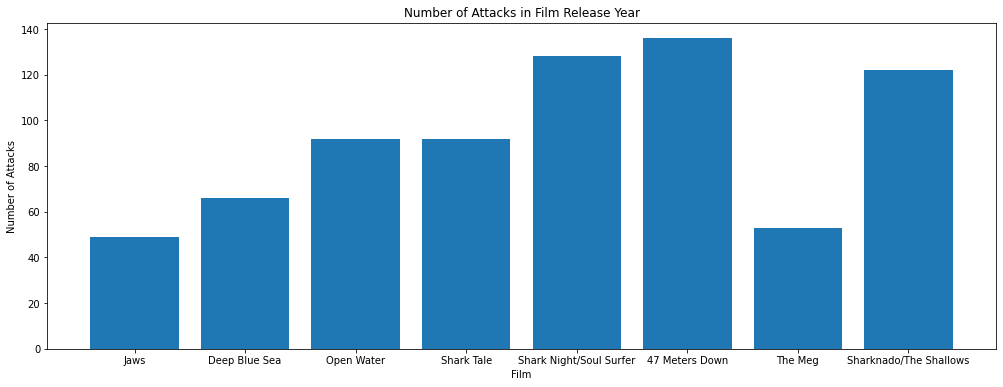

In [100]:
plt.figure(figsize=(17, 6))
plt.bar(list(films.keys()), counting)
plt.xlabel('Film')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks in Film Release Year')
plt.show()

In [101]:
attacksfilms=attacks[attacks['Year'] >= 1975]

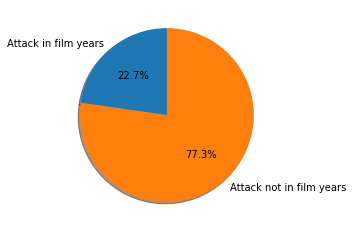

In [102]:
in_films = sum(attacksfilms['Year'].isin(film_years))
not_in_films = len(attacksfilms) - in_films

labels = ['Attack in film years', 'Attack not in film years']
sizes = [in_films, not_in_films]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [103]:
in_filmsper=in_films/len(film_years)
in_filmsper

92.25

In [109]:
not_in_filmsper=not_in_films/(attacksfilms["Year"].max()-1975-len(film_years))
round(not_in_filmsper,2)

71.63

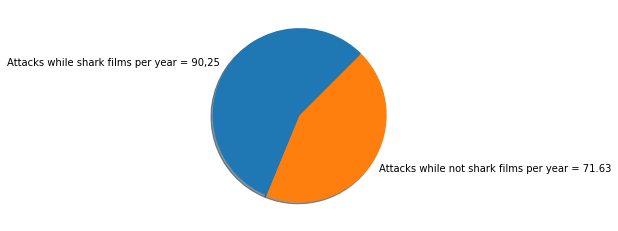

In [118]:
labels = ['Attacks while shark films per year = 90,25', 'Attacks while not shark films per year = 71.63']
sizes = [in_filmsper, not_in_filmsper]
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels,
        shadow=True, startangle=45)
plt.show()

In [119]:
attacksname=attacks.copy()
attacksname.dropna(subset=["Name"], inplace=True)
attacksname = attacksname[attacksname['Name'].str.match('^[A-Z]')]
attacksname = attacksname[~attacksname['Name'].isin(['Arab boy', 'Unknown', 'Russian male', 'Japanese diver', 'Zulu male', 'Anonymous', 'Unidentified', 'Indian male', 'Coast Guard personnel', 'M.C.'])]

attacksname['Name'] = attacksname['Name'].str.get(0)
attacksname["Name"].value_counts(dropna=False)

J    616
M    446
A    371
R    354
C    321
D    288
S    269
B    229
T    209
G    204
K    187
L    182
P    169
W    158
E    155
H    131
N    125
F    112
I     50
O     46
V     40
Z     24
Y     19
U     10
Q      5
Name: Name, dtype: int64

In [120]:
attacksname1=attacksname 
attacksname1 = attacksname1[attacksname1["Fatal (Y/N)"] != "UNKNOWN"]
attacksname1["Name"].value_counts(dropna=False)

J    562
M    401
A    342
R    325
C    294
D    265
S    247
B    215
T    196
G    182
K    171
L    169
P    154
W    146
E    136
H    119
N    111
F    102
I     45
O     44
V     34
Z     22
Y     17
U     10
Q      5
Name: Name, dtype: int64

<AxesSubplot: xlabel='Name', ylabel='count'>

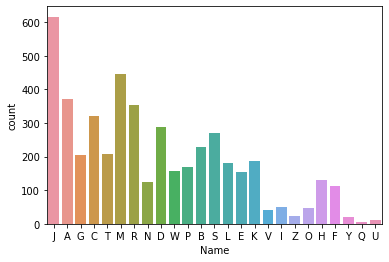

In [121]:
sns.countplot(x='Name', data=attacksname)

In [122]:
attacksname1["Death"]=attacksname1["Fatal (Y/N)"].apply(lambda x: 1 if x=="Y" else 0)
attacksname1["Death"].value_counts()

C:\Users\gqsal\AppData\Local\Temp\ipykernel_15708\413774630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacksname1["Death"]=attacksname1["Fatal (Y/N)"].apply(lambda x: 1 if x=="Y" else 0)


0    3385
1     929
Name: Death, dtype: int64

<AxesSubplot: xlabel='Name', ylabel='count'>

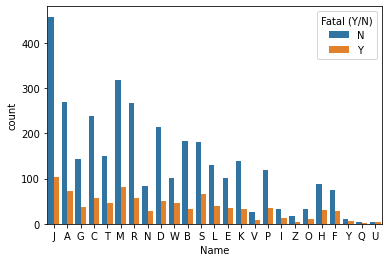

In [123]:
sns.countplot(x='Name', data=attacksname1, hue='Fatal (Y/N)')

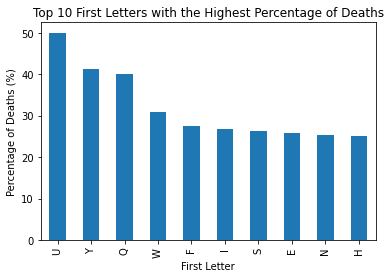

In [124]:
name_counts = attacksname1[attacksname1["Death"] == 1].groupby("Name").count()
name_percentages = 100 * name_counts["Death"] / attacksname1["Name"].value_counts()
sorted_percentages = name_percentages.sort_values(ascending=False)
sorted_percentages[:10].plot(kind='bar')
plt.xlabel("First Letter")
plt.ylabel("Percentage of Deaths (%)")
plt.title("Top 10 First Letters with the Highest Percentage of Deaths")
plt.show()